<a href="https://colab.research.google.com/github/IanSkapin/DataAnalytics/blob/main/modeling-and-visualisation/extending-perception/linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression Example from Textbook

Reference [A Geron](https://github.com/ageron/handson-ml2)

In [10]:
# Import the dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
import seaborn as sns
import plotly.express as px
import requests

In [11]:
# Load the data
oecd_bli = pd.read_csv('https://raw.githubusercontent.com/IanSkapin/DataAnalytics/main/modeling-and-visualisation/extending-perception/oecd_bli_2015.txt', thousands=',')
gdp_per_capita = pd.read_csv("https://raw.githubusercontent.com/IanSkapin/DataAnalytics/main/modeling-and-visualisation/extending-perception/gdp_per_capita.txt", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [12]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [13]:
oecd_bli[['INEQUALITY','Inequality']].value_counts()

INEQUALITY  Inequality
TOT         Total         888
MN          Men           881
WMN         Women         881
HGH         High          328
LW          Low           314
dtype: int64

In [14]:
oecd_bli2 = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli2.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [16]:
oecd_bli2 = oecd_bli2.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli2.head(5)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [17]:
gdp_per_capita.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [18]:
# title Run this Data PreProcessing Function (the code is hidden)
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # filter by this column inequality
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # pivot
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # renaming
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # we are setting the index
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [19]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
country_stats.head(5)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [20]:
country_stats = country_stats.reset_index()
country_stats.head()


,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


In [21]:
np.min(country_stats['Life satisfaction'])

4.8

In [22]:
np.max(country_stats['Life satisfaction'])

7.5

In [23]:
# generate our x and y
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [24]:
# check y
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

In [25]:
# check country_stats
country_stats

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


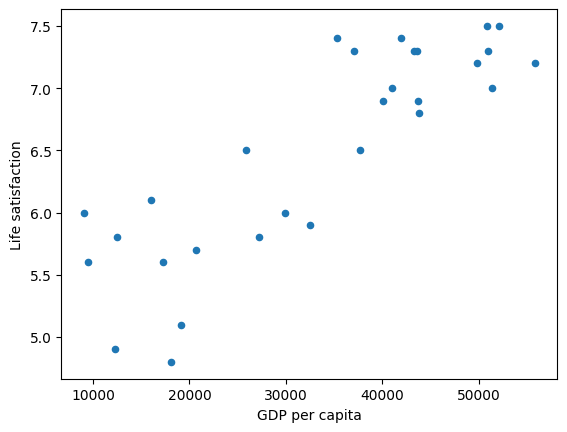

In [26]:
# Visualize the data as a scatter plot
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()



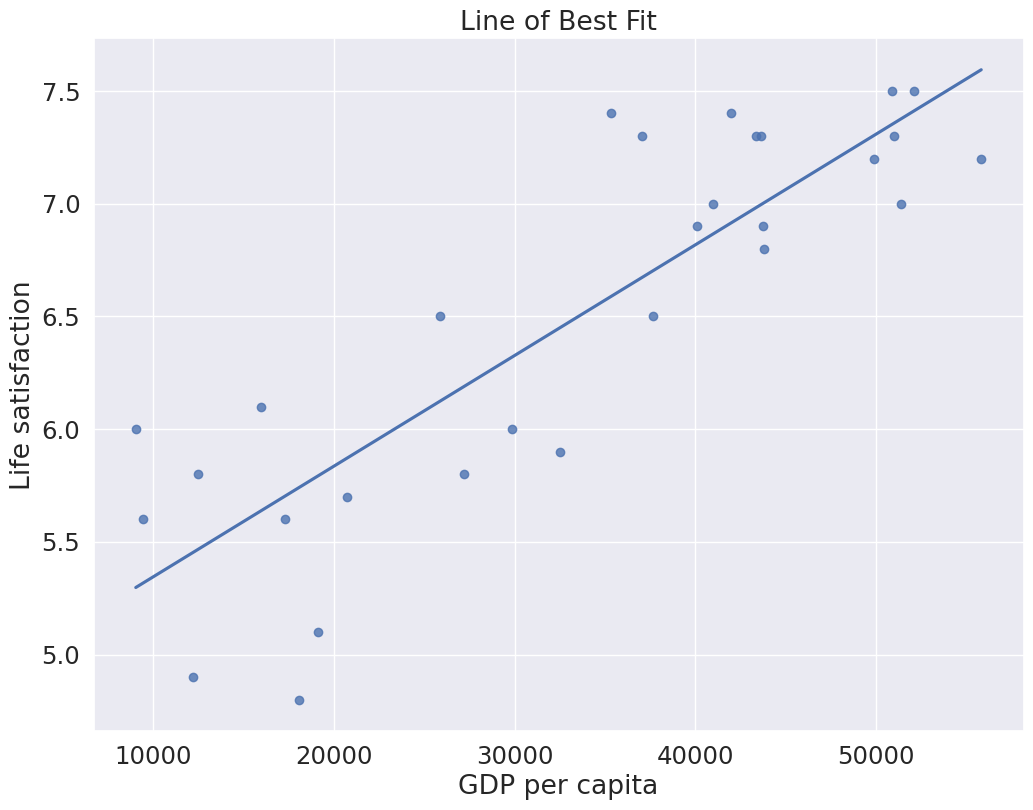

In [27]:
# line of best fit
sns.set(font_scale=1.6)

fig, ax1 = plt.subplots(figsize=(12, 9))

ax1 = sns.regplot(x="GDP per capita", y="Life satisfaction",
                  data=country_stats, ci=None)

ax1.set_title("Line of Best Fit");

In [28]:
# average
np.mean(country_stats['Life satisfaction'])

6.493103448275862

# Model Animation

In [29]:
from IPython.display import HTML
HTML('<iframe src="https://bpp.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=dbc40954-9050-41e8-844d-b00d00783a82&autoplay=true&offerviewer=false&showtitle=false&showbrand=false&captions=false&start=0&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


![picture](https://drive.google.com/uc?id=1v9TYD50t7YksdKtjywPhh9M0yLJtZ8bY)

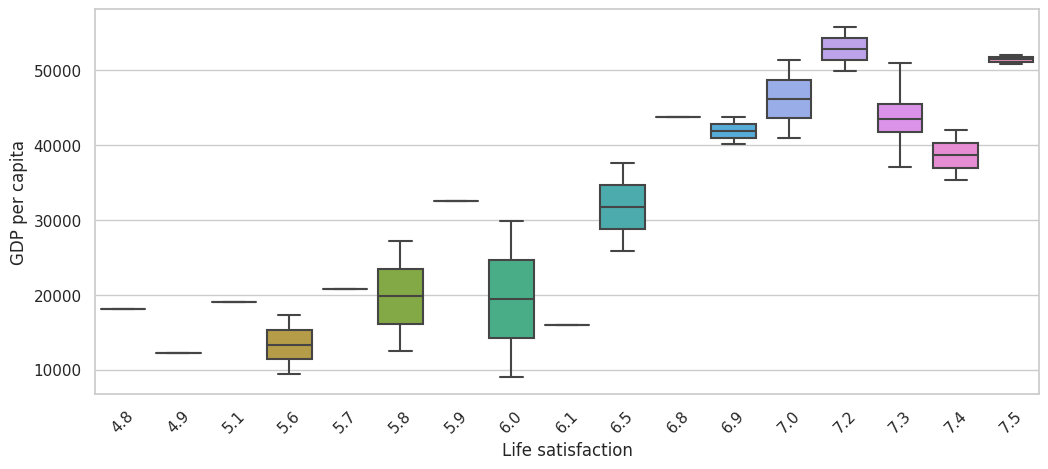

In [30]:
# boxplot
sns.set(style="whitegrid", font_scale=1)

f, ax = plt.subplots(1, 1,figsize=(12.18,5))

axe = sns.boxplot(x='Life satisfaction',y='GDP per capita', ax=ax, data=country_stats)

for tick in axe.get_xticklabels():
    tick.set_rotation(45)

axe.set(xlabel='Life satisfaction', ylabel='GDP per capita');

In [31]:
# plotly scatter on life satisfaction
import plotly.express as px
fig = px.scatter(country_stats.reset_index(), x="GDP per capita", y='Life satisfaction')
fig.show()

In [32]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()


In [33]:
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>


In [34]:
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [35]:
# Train the model
model.fit(X, y)

LinearRegression()

In [37]:
# Make a prediction for Cyprus
X_new = [[22587]]

print(model.predict(X_new))

[[5.96242338]]


In [38]:
# Make a prediction for Rainbows & Unicorns Land
GDP_per_capita = 30000 # put the number here

X_new = [[GDP_per_capita]]
print(model.predict(X_new))

[[6.32651618]]


In [39]:
model.intercept_

array([4.8530528])

In [40]:
# Set decmial places in numpy
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.7f}'.format})

# print coefficients
print("Intercept Coefficient of Income: {}".format(model.intercept_))
print("Slope Coefficient of Income: {}".format(model.coef_))


Intercept Coefficient of Income: [4.8530528]
Slope Coefficient of Income: [[0.0000491]]


## Understand Regression Output

The linear model was trained to:

\begin{align*}
\mathrm{Life Satisfaction}_{t} = \alpha \ (4.85)
    &+ \beta_{1} \ (0.0000491) \ \mathrm{Income}_{t} \\
 + \ \epsilon
\end{align*}

In [41]:
# custom function to understand prediction
def estimated_y(x, coeff, inter):
    x = round(x, 2)
    coeff = round(coeff, 2)
    inter = round(inter, 2)
    est_y = (x * coeff) + inter
    prediction = round(est_y, 0)

    return prediction

In [42]:
# example in action
intercept = model.intercept_
coefficient = model.coef_

annual_gdp = intercept + (1000*coefficient)

# y = a + bx
print(annual_gdp)

[[4.9021682]]


In [43]:
# rate of monotonicity
per_1_thousand_increase = (10000*coefficient)

print(np.round(per_1_thousand_increase, 2))

[[0.4900000]]


In [44]:
country_stats.head()

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


In [45]:
def column_renamer(df, old_name, new_name):
    df.rename(columns={old_name: new_name}, inplace=True)

In [46]:
# rename columns
column_renamer(country_stats, "Life satisfaction", "Life_Satisfaction")

In [47]:
column_renamer(country_stats, "GDP per capita", "GDPperCapita")

In [48]:
# manual calculation


In [49]:
# Pass data and `formula` into ols(), use and `.fit()` the model to the data
from statsmodels.formula.api import ols


model_fit = ols(formula="Life_Satisfaction ~ GDPperCapita", data=country_stats).fit()

#model_fit = ols(formula="Life_Satisfaction ~ GDPperCapita*", data=country_stats).fit()

In [50]:
# extract key model parameters
x1 = model_fit.params['GDPperCapita']

print( "uplift factor for GDPperCapita = {p}".format(p=x1) )
print(model_fit.summary())

uplift factor for GDPperCapita = 4.9115445891584784e-05
                            OLS Regression Results                            
Dep. Variable:      Life_Satisfaction   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     74.67
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.95e-09
Time:                        07:49:16   Log-Likelihood:                -16.345
No. Observations:                  29   AIC:                             36.69
Df Residuals:                      27   BIC:                             39.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [51]:
# what is the quality of our model

y_pred = model.predict(country_stats[["GDPperCapita"]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [52]:
# comparison
comparison = pd.DataFrame(np.append(y, y_pred, axis=1),
                          columns=["Actuals", "Prediction"],
                          index=country_stats.index)
comparison.head(20)

,Actuals,Prediction
0,6.0,5.297789
1,5.6,5.316574
2,4.9,5.454221
3,5.8,5.466767
4,6.1,5.638494
5,5.6,5.702165
6,4.8,5.740288
7,5.1,5.792218
8,5.7,5.871338
9,6.5,6.123410


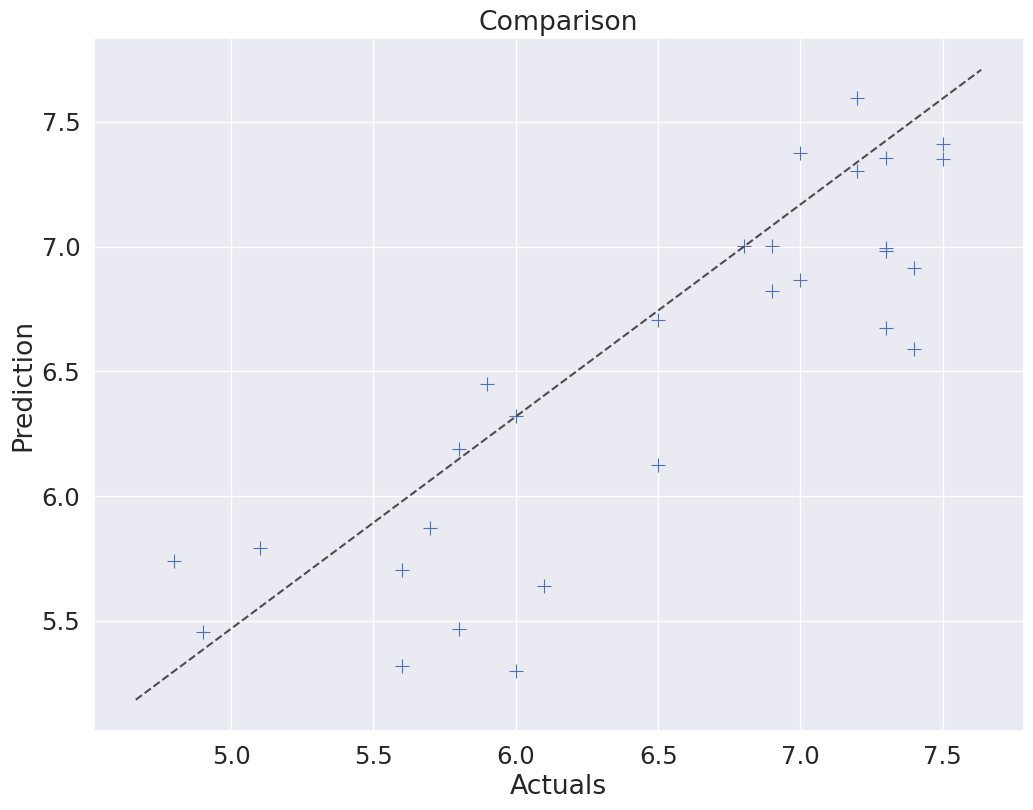

In [53]:
# plot comparison
sns.set(font_scale=1.6)

fig, ax1 = plt.subplots(figsize=(12, 9))

ax1 = sns.scatterplot(x="Actuals", y="Prediction", data=comparison, ax=ax1, s=100, marker="+")

ax1.set_title("Comparison")
ax1.plot(ax1.get_xlim(), ax1.get_ylim(), ls="--", c=".3");

In [54]:
# Score directly with the model, default: R2
r2 = model.score(X, y)

print(r2)

0.7344414355437031


Model Validation

In [55]:
# a more interpretable measure of error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    try:
      difference = y_true - y_pred
      actual = y_true
      absolute_pct_error = np.mean(np.abs(difference / actual)) * 100
    except Exception:
      absolute_pct_error = 0
    return np.round(absolute_pct_error, decimals=2)

In [56]:
# interpret using custom formula
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

mape = mean_absolute_percentage_error(y, y_pred)

print(mape)


5.79


# Least-Squares Linear Regression: Potential Issues

**Assumptions**

1. Monotone linear relationship
2. Normality of errors
3. No autocorrelation (not correlated with itself)
4. Homoscedasticity

> 🔑 https://statisticsbyjim.com/regression/ols-linear-regression-assumptions

![picture](https://drive.google.com/uc?id=1-c65vlE9iw1loKCbSfGZhnmtUshm03Oe)

# Solutions:

1. Linearisation by means of transformation.
2. Weighted Least-Squares.
3. Huber Loss Regression.
4. Theil-Sen Regression (Spatial Median).
5. Many more...

# Huber Loss Example

![picture](https://drive.google.com/uc?id=1tzJnI_lv4Wvro-AqoZh95lbOpxaVV7cD)

# Credit for some of the images:

[Robust Regression reference](https://towardsdatascience.com/robust-regression-23b633e5d6a5)

https://www.youtube.com/watch?v=nk2CQITm_eo&t=629s